## Import Libraries

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.datasets import load_boston
import numpy as np
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import PredefinedSplit
from sklearn.model_selection import train_test_split, KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score
from IPython.display import display

## Data preparation

In [34]:
data1 = pd.read_csv('cancer_reg.csv')
data2 = pd.read_csv('avg-household-size.csv')

### About Dataset

The dataset contains 2 .csv files

**File 1st**
This file contains demographic information about different regions, including details about household size and geographical location. Here's a description of each column:

avganncount: Mean number of reported cases of cancer diagnosed annually (a)  

avgdeathsperyear:	Mean number of reported mortalities due to cancer (a)  

target_deathrate:	Dependent variable. Mean per capita (100,000) cancer mortalities (a) 

incidencerate:	Mean per capita (100,000) cancer diagnoses (a)  

medincome:	Median income per county (b)  

popest2015:	Population of county (b)   

povertypercent:	Percent of populace in poverty (b)  

studypercap:	Per capita number of cancer-related clinical trials per county (a)  

binnedinc:	Median income per capita binned by decile (b)  (string)

medianage:	Median age of county residents (b)  

medianagemale:	Median age of male county residents (b)  

medianagefemale:	Median age of female county residents (b)  

geography:	County name (b)  

percentmarried:	Percent of county residents who are married (b)  

pctnohs18_24:	Percent of county residents ages 18-24 highest education attained: less than high school (b)  

pcths18_24:	Percent of county residents ages 18-24 highest education attained: high school diploma (b)  

pctsomecol18_24:	Percent of county residents ages 18-24 highest education attained: some college (b)  

pctbachdeg18_24:	Percent of county residents ages 18-24 highest education attained: bachelor’s degree (b)   

pcths25_over:	Percent of county residents ages 25 and over highest education attained: high school diploma (b) 

pctbachdeg25_over:	Percent of county residents ages 25 and over highest education attained: bachelor’s degree (b) 

pctemployed16_over:	Percent of county residents ages 16 and over employed (b)   

pctunemployed16_over:	Percent of county residents ages 16 and over unemployed (b)  

pctprivatecoverage:	Percent of county residents with private health coverage (b)   

pctprivatecoveragealone:	Percent of county residents with private health coverage alone (no public assistance(b)

pctempprivcoverage:	Percent of county residents with employee-provided private health coverage (b)  

pctpubliccoverage:	Percent of county residents with government-provided health coverage (b)  

pctpubliccoveragealone:	Percent of county residents with government-provided health coverage alone (b)  

pctwhite:	Percent of county residents who identify as White (b)  

pctblack:	Percent of county residents who identify as Black (b)  

pctasian:	Percent of county residents who identify as Asian (b)  

pctotherrace:	Percent of county residents who identify in a category which is not White, Black, or Asian (b)  

pctmarriedhouseholds:	Percent of married households (b)  

birthrate:	Number of live births relative to number of women in county (b)  

**File 2nd**

This file contains demographic information about different regions, including details about household size and geographical location. Here's a description of each column:

statefips: The FIPS code representing the state.

countyfips: The FIPS code representing the county or census area within the state.

avghouseholdsize: The average household size in the region.

geography: The geographical location, typically represented as the county or census area name followed by the state name.

Each row in the file represents a specific region, providing details about household size and geographical location. This information can be used for various demographic analyses and studies.

**-->Target variable:** target_deathrate

Information sources: https://data.world/exercises/linear-regression-exercise-1/workspace/data-dictionary

## EDA

In [35]:
data1.head()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.0,469,164.9,489.8,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.0,70,161.3,411.6,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.0,50,174.7,349.7,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.0,202,194.8,430.4,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.0,26,144.4,350.1,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657


In [36]:
data2.head()

,statefips,countyfips,avghouseholdsize,geography
0,2,13,2.43,"Aleutians East Borough, Alaska"
1,2,16,3.59,"Aleutians West Census Area, Alaska"
2,2,20,2.77,"Anchorage Municipality, Alaska"
3,2,50,3.86,"Bethel Census Area, Alaska"
4,2,60,2.50,"Bristol Bay Borough, Alaska"


In [37]:
data1.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


### Distribution & Relation

In [38]:
data1['target_deathrate'].describe()

count    3047.000000
mean      178.664063
std        27.751511
min        59.700000
25%       161.200000
50%       178.100000
75%       195.200000
max       362.800000
Name: target_deathrate, dtype: float64

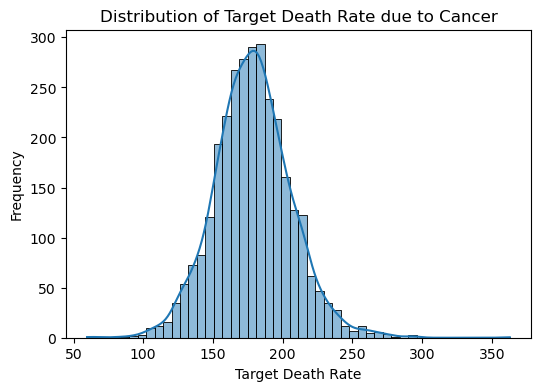

In [39]:
# Distribution of Target Death Rate
plt.figure(figsize=(6, 4))
sns.histplot(data=data1, x='target_deathrate', bins=50, kde=True)
plt.title('Distribution of Target Death Rate due to Cancer')
plt.xlabel('Target Death Rate')
plt.ylabel('Frequency')
plt.show()

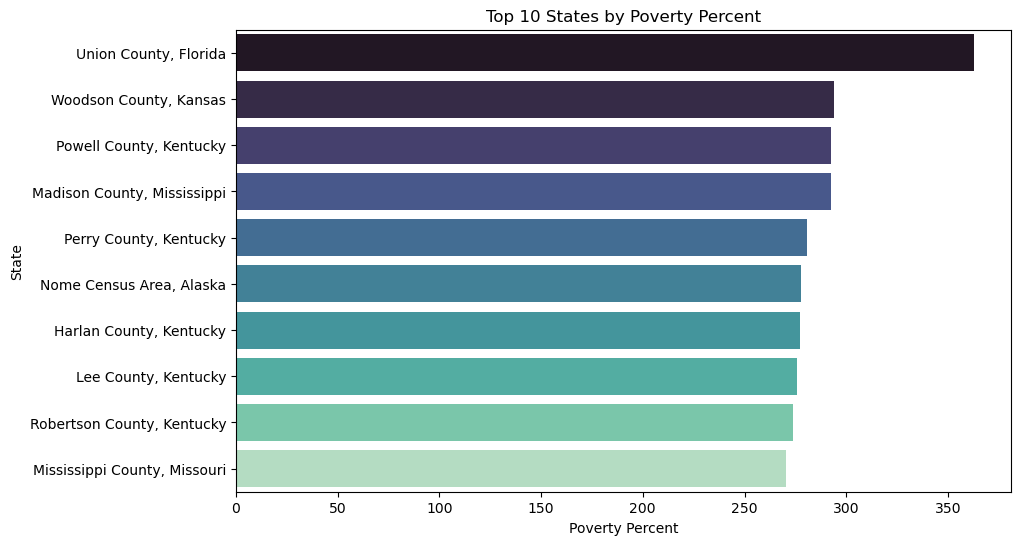

In [40]:
# Bar graph of the target_deathrate by State
data1_sorted = data1.sort_values(by='target_deathrate', ascending=False)
top_10_states = data1_sorted.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_10_states, x='target_deathrate', y='geography', palette='mako')
plt.title('Top 10 States by Poverty Percent')
plt.xlabel('Poverty Percent')
plt.ylabel('State')
plt.show()

**-->Uniin County, Florida has the highest mean per capita (100,000) cancer mortalities**

In [41]:
data1['medincome'].describe()

count      3047.000000
mean      47063.281917
std       12040.090836
min       22640.000000
25%       38882.500000
50%       45207.000000
75%       52492.000000
max      125635.000000
Name: medincome, dtype: float64

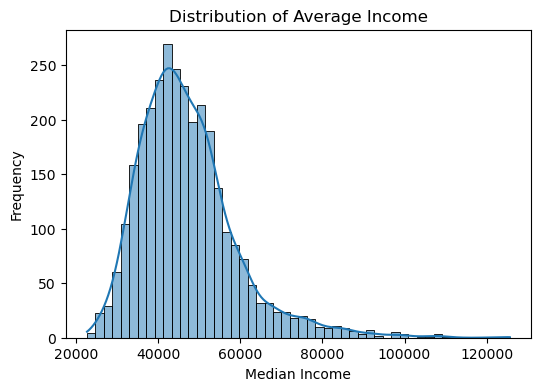

In [42]:
# Distribution of Average Income
plt.figure(figsize=(6, 4))
sns.histplot(data=data1, x='medincome', bins=50, kde=True)
plt.title('Distribution of Average Income')
plt.xlabel('Median Income')
plt.ylabel('Frequency')
plt.show()

In [43]:
data1['povertypercent'].describe()

count    3047.000000
mean       16.878175
std         6.409087
min         3.200000
25%        12.150000
50%        15.900000
75%        20.400000
max        47.400000
Name: povertypercent, dtype: float64

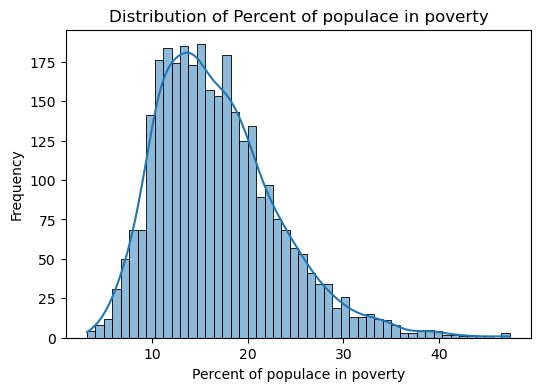

In [44]:
# Distribution of Percent of populace in poverty
plt.figure(figsize=(6, 4))
sns.histplot(data=data1, x='povertypercent', bins=50, kde=True)
plt.title('Distribution of Percent of populace in poverty')
plt.xlabel('Percent of populace in poverty')
plt.ylabel('Frequency')
plt.show()

In [45]:
data1['avgdeathsperyear'].describe()

count     3047.000000
mean       185.965868
std        504.134286
min          3.000000
25%         28.000000
50%         61.000000
75%        149.000000
max      14010.000000
Name: avgdeathsperyear, dtype: float64

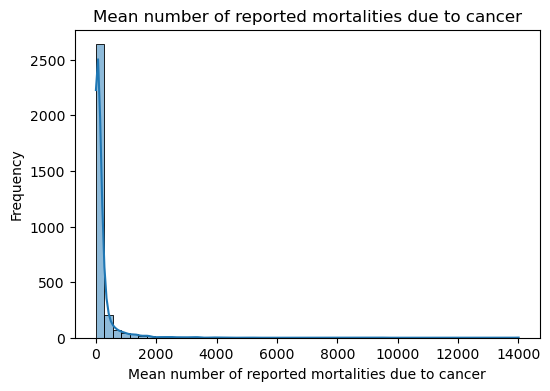

In [46]:
# Distribution of Percent of Mean number of reported mortalities due to cancer (a)
plt.figure(figsize=(6, 4))
sns.histplot(data=data1, x='avgdeathsperyear', bins=50, kde=True)
plt.title('Mean number of reported mortalities due to cancer')
plt.xlabel('Mean number of reported mortalities due to cancer')
plt.ylabel('Frequency')
plt.show()

In [47]:
data1['pctpubliccoveragealone'].describe()

count    3047.000000
mean       19.240072
std         6.113041
min         2.600000
25%        14.850000
50%        18.800000
75%        23.100000
max        46.600000
Name: pctpubliccoveragealone, dtype: float64

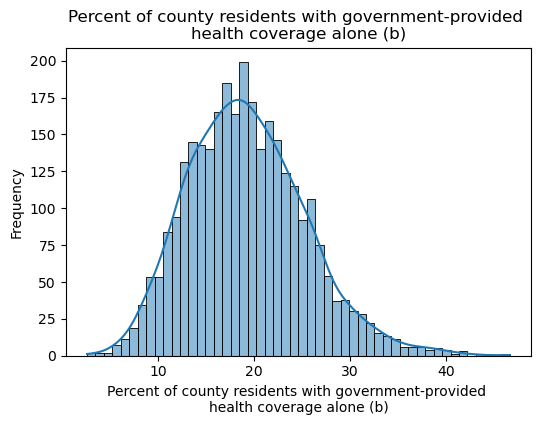

In [48]:
# Distribution of Percent of county residents with government-provided health coverage alone (b)
plt.figure(figsize=(6, 4))
sns.histplot(data=data1, x='pctpubliccoveragealone', bins=50, kde=True)
plt.title('Percent of county residents with government-provided \nhealth coverage alone (b)')
plt.xlabel('Percent of county residents with government-provided \nhealth coverage alone (b)')
plt.ylabel('Frequency')
plt.show()

### Correlation

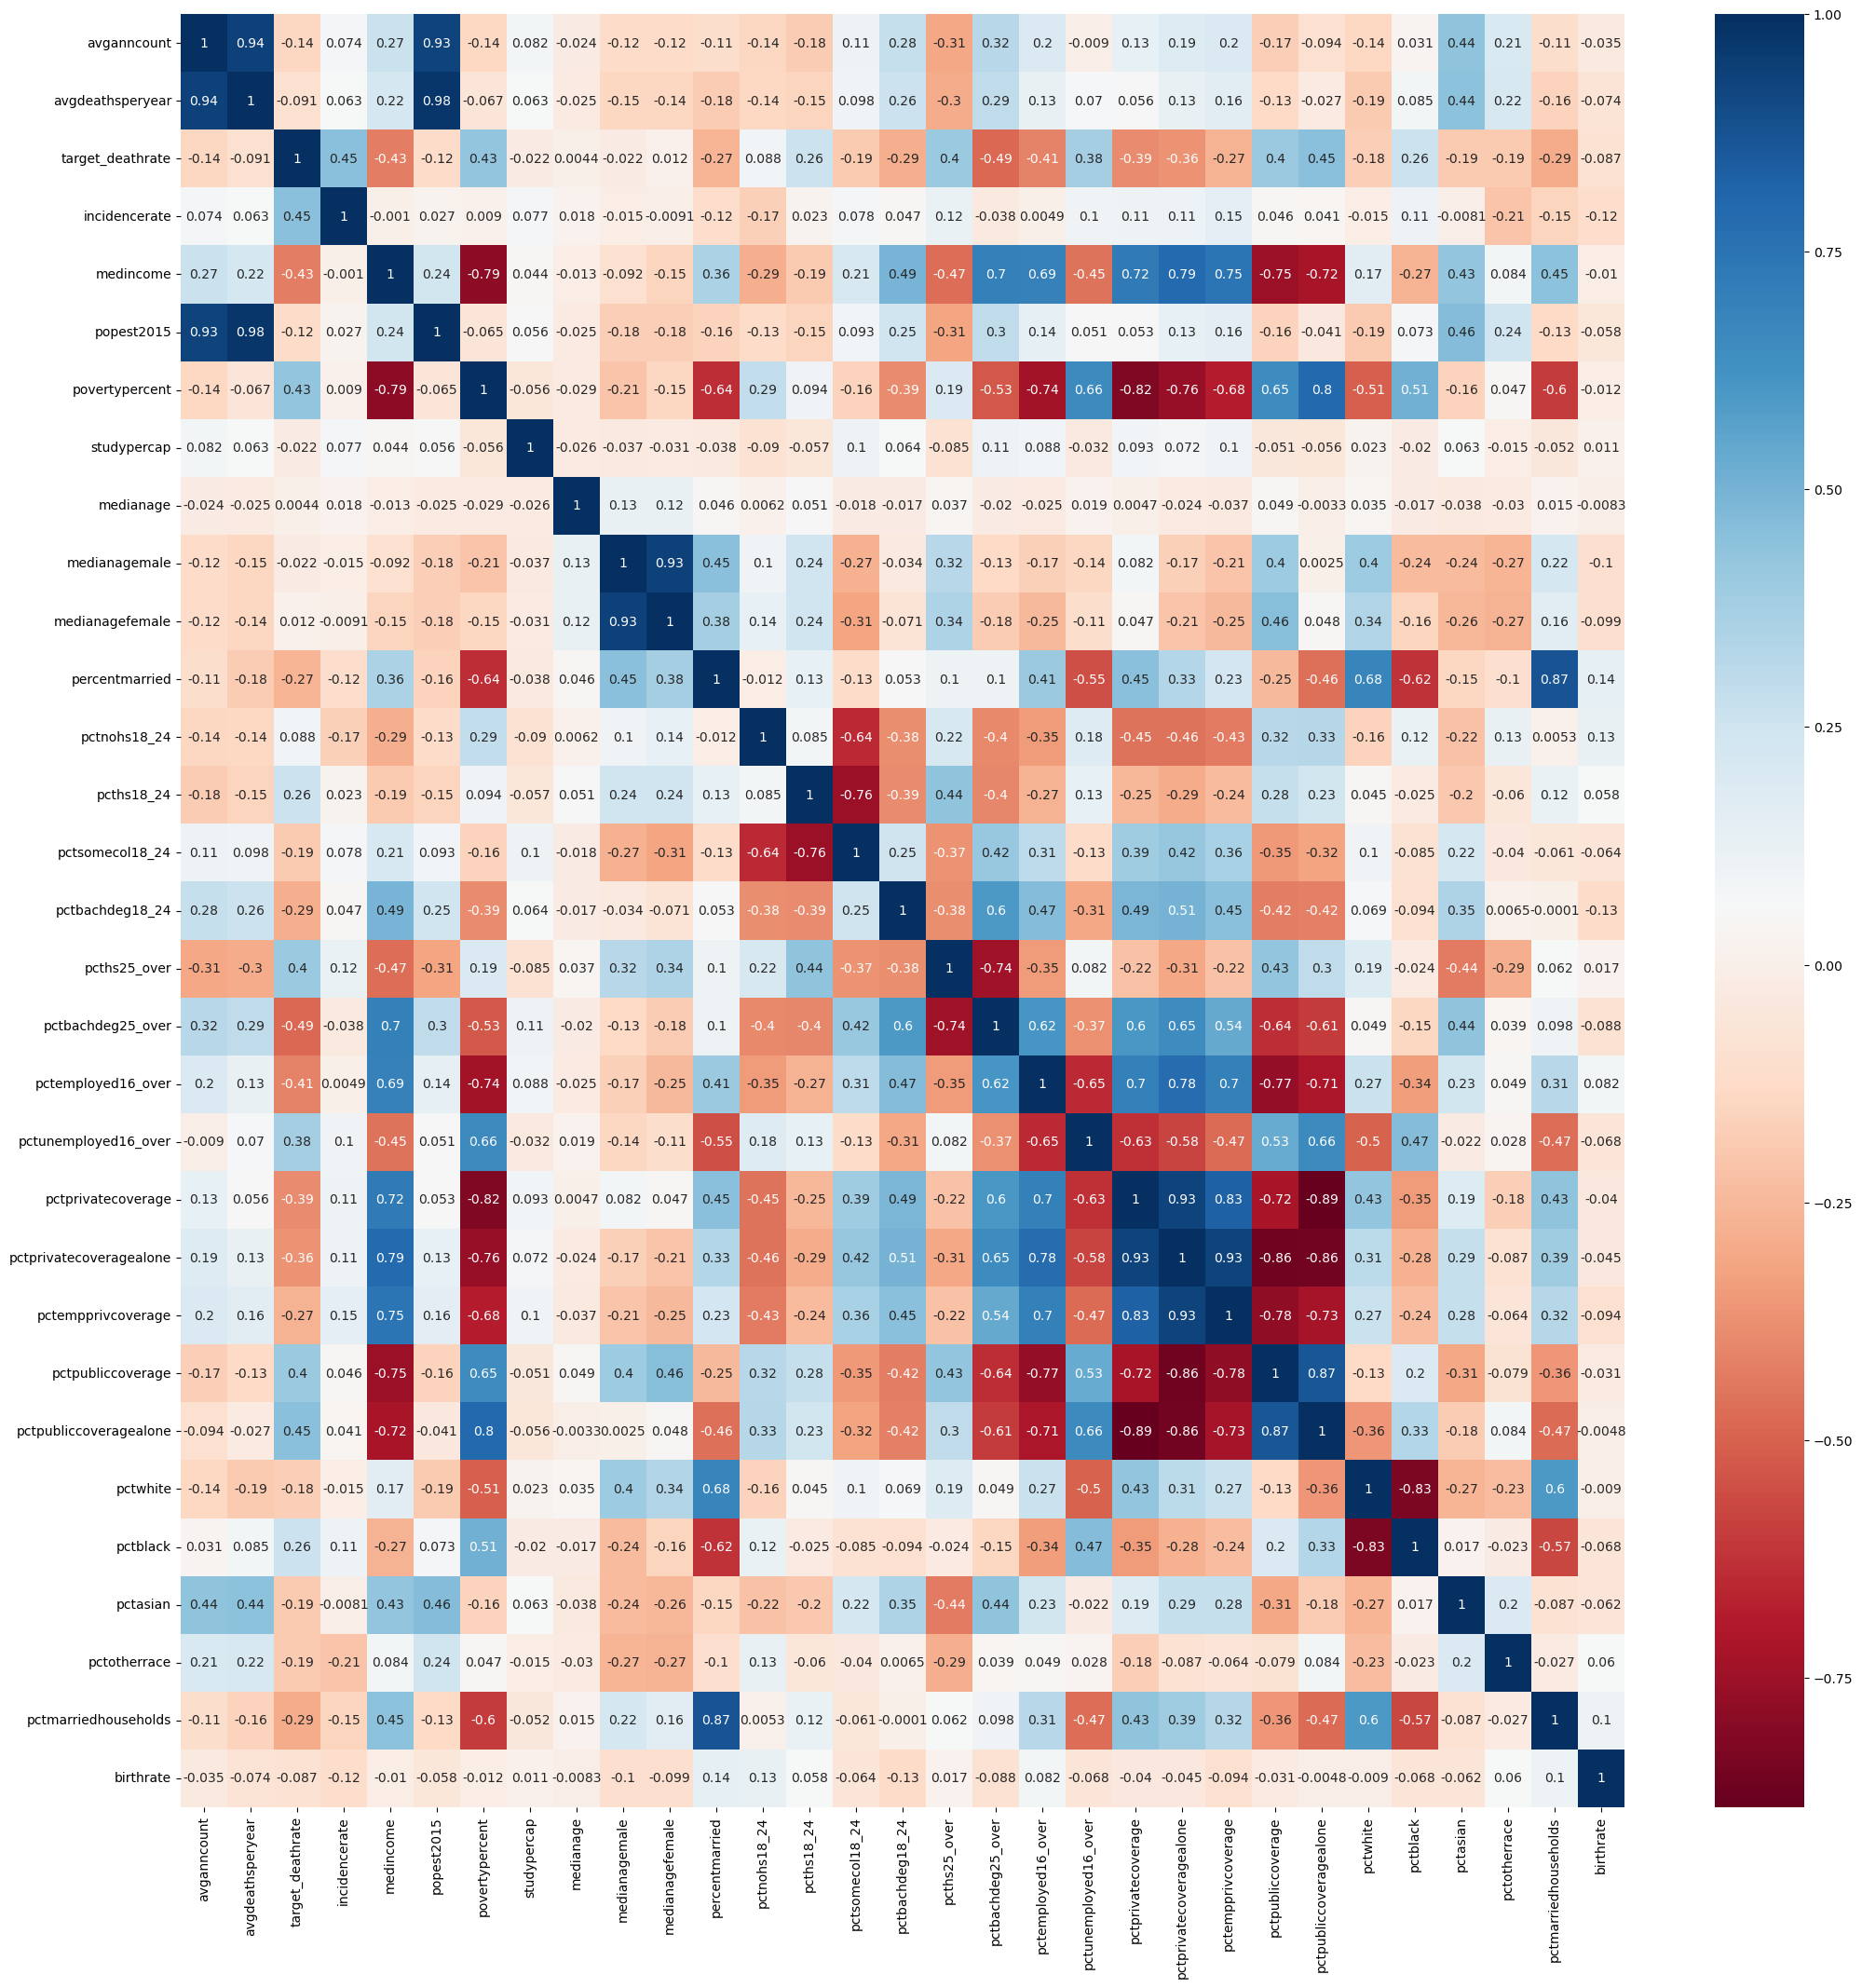

In [49]:
#Heatmap for correlation
#Using Pearson Correlation
plt.figure(figsize=(25,25))
cor = data1.corr()
sns.heatmap(cor, annot=True, cmap='RdBu')
plt.show()

'incidencerate', 'medincome', 'povertypercent', 'pctbachdeg25_over', 'pctpubliccoveragealone' have high correlation with target variable

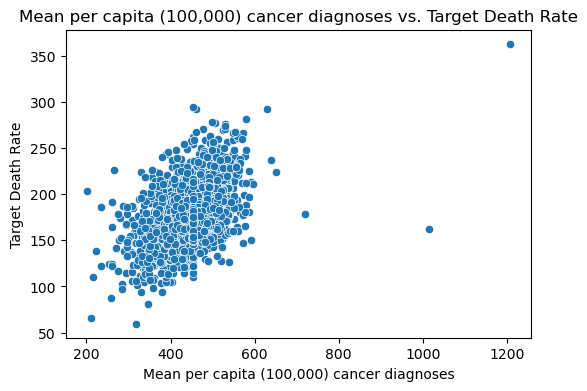

In [50]:
# Relationship between Mean per capita (100,000) cancer diagnoses and Target Death Rate
plt.figure(figsize=(6, 4))
sns.color_palette(palette='Blues_d')
sns.scatterplot(data=data1, x='incidencerate', y='target_deathrate')
plt.title('Mean per capita (100,000) cancer diagnoses vs. Target Death Rate')
plt.xlabel('Mean per capita (100,000) cancer diagnoses')
plt.ylabel('Target Death Rate')
plt.show()

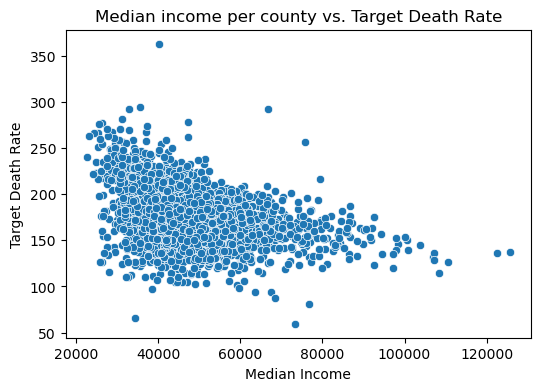

In [51]:
# Relationship between Median income per county and Target Death Rate
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data1, x='medincome', y='target_deathrate')
plt.title('Median income per county vs. Target Death Rate')
plt.xlabel('Median Income')
plt.ylabel('Target Death Rate')
plt.show()

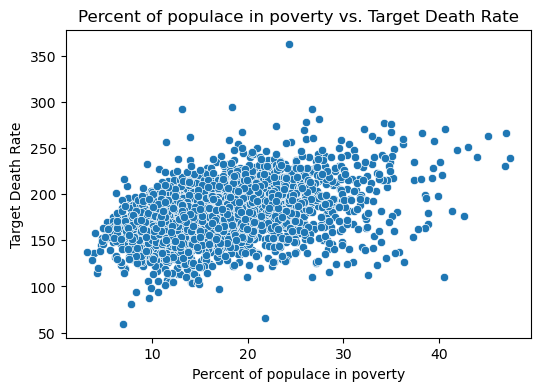

In [52]:
# Relationship between Percent of populace in poverty  and Target Death Rate
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data1, x='povertypercent', y='target_deathrate')
plt.title('Percent of populace in poverty vs. Target Death Rate')
plt.xlabel('Percent of populace in poverty')
plt.ylabel('Target Death Rate')
plt.show()

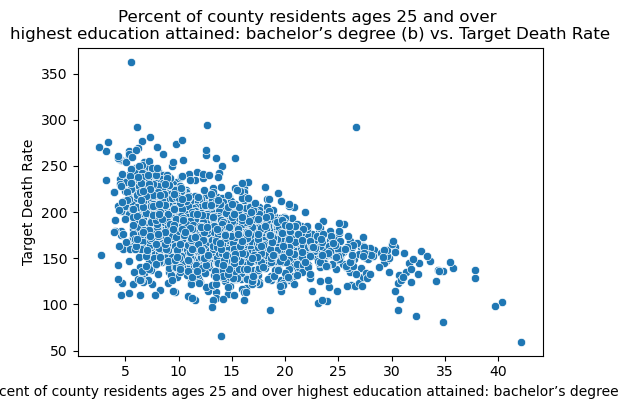

In [53]:
# Relationship between Percent of county residents ages 25 and over highest education attained: bachelor’s degree (b) 
# and Target Death Rate
plt.figure(figsize=(6, 4))
sns.color_palette(palette='Blues_d')
sns.scatterplot(data=data1, x='pctbachdeg25_over', y='target_deathrate')
plt.title('Percent of county residents ages 25 and over \nhighest education attained: bachelor’s degree (b) vs. Target Death Rate')
plt.xlabel('Percent of county residents ages 25 and over highest education attained: bachelor’s degree (b)')
plt.ylabel('Target Death Rate')
plt.show()

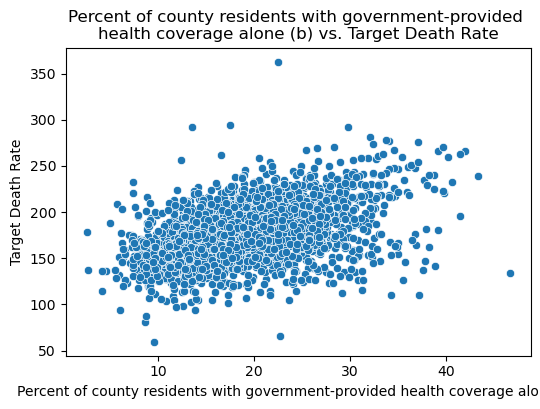

In [54]:
# Relationship between Percent of populace in poverty  and Target Death Rate
plt.figure(figsize=(6, 4))
sns.scatterplot(data=data1, x='pctpubliccoveragealone', y='target_deathrate')
plt.title('Percent of county residents with government-provided \nhealth coverage alone (b) vs. Target Death Rate')
plt.xlabel('Percent of county residents with government-provided health coverage alone (b)')
plt.ylabel('Target Death Rate')
plt.show()

## Data Preprocessing

In [55]:
data1.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

In [56]:
data2.columns

Index(['statefips', 'countyfips', 'avghouseholdsize', 'geography'], dtype='object')

**common feature:**  geography

In [57]:
#Merging two data sets by geography
cancer = pd.merge(data1, data2, on='geography')
cancer.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24',
       'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate', 'statefips',
       'countyfips', 'avghouseholdsize'],
      dtype='object')

In [58]:
cancer.shape

(3047, 36)

### Dropping unnecessary columns

In [59]:
#After merging the two files, since the information in the 'geography' column has been represented in other columns, 
#we can drop the 'geography' column.
cancer = cancer.drop(['geography'],axis=1)
cancer.shape

(3047, 35)

### Dealing with missing values

In [60]:
cancer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3047 entries, 0 to 3046
Data columns (total 35 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   avganncount              3047 non-null   float64
 1   avgdeathsperyear         3047 non-null   int64  
 2   target_deathrate         3047 non-null   float64
 3   incidencerate            3047 non-null   float64
 4   medincome                3047 non-null   int64  
 5   popest2015               3047 non-null   int64  
 6   povertypercent           3047 non-null   float64
 7   studypercap              3047 non-null   float64
 8   binnedinc                3047 non-null   object 
 9   medianage                3047 non-null   float64
 10  medianagemale            3047 non-null   float64
 11  medianagefemale          3047 non-null   float64
 12  percentmarried           3047 non-null   float64
 13  pctnohs18_24             3047 non-null   float64
 14  pcths18_24              

In [61]:
cancer.isnull().sum()

avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctotherrace                  0
pctmarriedhouseholds          0
birthrat

**3 Columns have null values:**
* **pctsomecol18_24:** Percent of county residents ages 18-24 highest education attained: some college (b)
* **pctemployed16_over:** Percent of county residents ages 16 and over employed (b)
* **pctprivatecoveragealone:** Percentage of population covered by private health insurance alone.

In [62]:
#calculate percentage of missing values
pd.DataFrame({'column_name': ['pctsomecol18_24','pctemployed16_over','pctprivatecoveragealone'],
                '%_missing': [cancer['pctsomecol18_24'].isnull().sum() * 100 / len(cancer),
                              cancer['pctemployed16_over'].isnull().sum() * 100 / len(cancer),
                              cancer['pctprivatecoveragealone'].isnull().sum() * 100 / len(cancer),]})

,column_name,%_missing
0,pctsomecol18_24,74.991795
1,pctemployed16_over,4.988513
2,pctprivatecoveragealone,19.986872


<AxesSubplot: >

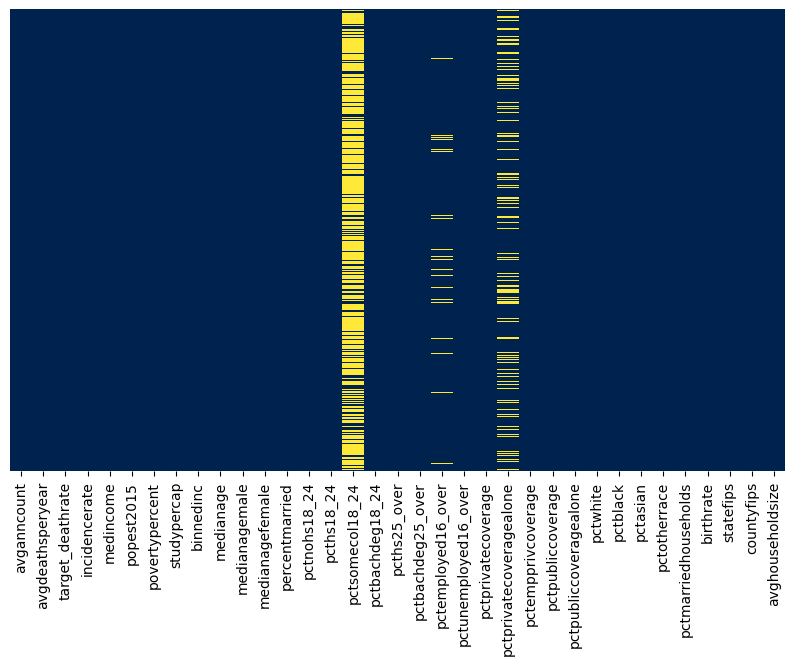

In [63]:
plt.figure(figsize = (10,6)) #is to create a figure object with a given size
sns.heatmap(cancer.isna(), cbar=False, cmap='cividis', yticklabels=False)

In [64]:
# Filter out rows with enough data in column 'pctsomecol18_24'
data_filtered = data1.dropna(subset=['pctsomecol18_24'])
data_filtered.isnull().sum()

avganncount                  0
avgdeathsperyear             0
target_deathrate             0
incidencerate                0
medincome                    0
popest2015                   0
povertypercent               0
studypercap                  0
binnedinc                    0
medianage                    0
medianagemale                0
medianagefemale              0
geography                    0
percentmarried               0
pctnohs18_24                 0
pcths18_24                   0
pctsomecol18_24              0
pctbachdeg18_24              0
pcths25_over                 0
pctbachdeg25_over            0
pctemployed16_over          35
pctunemployed16_over         0
pctprivatecoverage           0
pctprivatecoveragealone    149
pctempprivcoverage           0
pctpubliccoverage            0
pctpubliccoveragealone       0
pctwhite                     0
pctblack                     0
pctasian                     0
pctotherrace                 0
pctmarriedhouseholds         0
birthrat

In [65]:
# Calculate the total value of 4 columns: 
# 'pctnohs18_24', 'pcths18_24', 'pctsomecol18_24', 'pctbachdeg18_24' on each row
total_sums = []
for index, row in data_filtered.iterrows():
    total_sum = row[['pctnohs18_24', 'pcths18_24', 'pctsomecol18_24', 'pctbachdeg18_24']].sum()
    total_sums.append(total_sum)
    
total_sums

[100.0,
 100.0,
 100.0,
 99.9,
 99.9,
 100.0,
 100.0,
 100.10000000000001,
 100.0,
 100.0,
 100.0,
 99.9,
 100.0,
 100.1,
 100.0,
 100.00000000000001,
 100.10000000000001,
 100.0,
 99.99999999999999,
 100.0,
 99.89999999999999,
 100.0,
 99.9,
 100.10000000000001,
 100.1,
 99.9,
 100.0,
 99.9,
 99.9,
 100.00000000000001,
 99.99999999999999,
 100.1,
 100.0,
 100.0,
 100.0,
 100.0,
 100.0,
 100.10000000000001,
 100.1,
 100.0,
 99.99999999999999,
 99.9,
 100.0,
 99.9,
 100.10000000000001,
 99.9,
 100.0,
 100.0,
 99.9,
 100.00000000000001,
 100.1,
 100.10000000000001,
 100.0,
 100.10000000000001,
 100.0,
 100.0,
 100.1,
 100.0,
 99.99999999999999,
 100.0,
 100.00000000000001,
 100.0,
 100.10000000000001,
 100.0,
 99.9,
 100.0,
 100.1,
 100.10000000000001,
 100.0,
 100.10000000000001,
 100.1,
 100.0,
 100.00000000000001,
 100.0,
 100.0,
 100.0,
 100.10000000000001,
 99.89999999999999,
 100.0,
 100.0,
 100.0,
 99.99999999999999,
 100.00000000000001,
 99.89999999999999,
 100.0,
 100.0,
 100.0,

In [66]:
sum(total_sums)/len(data_filtered)

99.99868766404207

In [67]:
#Observing that the sum of the values in the columns:
#pctnohs18_24, pcths18_24, pctsomecol18_24, pctbachdeg18_24 always approximates 100%, 
#we can infer that the data from column pctsomecol18_24 can be represented by the other three columns. 
#Therefore, we will drop this column.
cancer.drop(['pctsomecol18_24'], axis=1, inplace=True)

In [68]:
cancer.shape

(3047, 34)

### Data Imputation

In [69]:
#Replace by median
cancer.pctemployed16_over.fillna(cancer.pctemployed16_over.median(),inplace=True)
cancer.pctprivatecoveragealone.fillna(cancer.pctprivatecoveragealone.median(),inplace=True)

In [70]:
cancer.isnull().sum()

avganncount                0
avgdeathsperyear           0
target_deathrate           0
incidencerate              0
medincome                  0
popest2015                 0
povertypercent             0
studypercap                0
binnedinc                  0
medianage                  0
medianagemale              0
medianagefemale            0
percentmarried             0
pctnohs18_24               0
pcths18_24                 0
pctbachdeg18_24            0
pcths25_over               0
pctbachdeg25_over          0
pctemployed16_over         0
pctunemployed16_over       0
pctprivatecoverage         0
pctprivatecoveragealone    0
pctempprivcoverage         0
pctpubliccoverage          0
pctpubliccoveragealone     0
pctwhite                   0
pctblack                   0
pctasian                   0
pctotherrace               0
pctmarriedhouseholds       0
birthrate                  0
statefips                  0
countyfips                 0
avghouseholdsize           0
dtype: int64

In [71]:
cancer.nunique()

avganncount                 929
avgdeathsperyear            608
target_deathrate           1053
incidencerate              1506
medincome                  2920
popest2015                 2999
povertypercent              333
studypercap                1117
binnedinc                    10
medianage                   325
medianagemale               298
medianagefemale             296
percentmarried              362
pctnohs18_24                405
pcths18_24                  469
pctbachdeg18_24             219
pcths25_over                361
pctbachdeg25_over           281
pctemployed16_over          409
pctunemployed16_over        195
pctprivatecoverage          498
pctprivatecoveragealone     459
pctempprivcoverage          450
pctpubliccoverage           395
pctpubliccoveragealone      319
pctwhite                   3044
pctblack                   2972
pctasian                   2852
pctotherrace               2903
pctmarriedhouseholds       3043
birthrate                  3019
statefip

In [72]:
cancer['binnedinc'].unique()

array(['(61494.5, 125635]', '(48021.6, 51046.4]', '(42724.4, 45201]',
       '(51046.4, 54545.6]', '(37413.8, 40362.7]', '(40362.7, 42724.4]',
       '(54545.6, 61494.5]', '(34218.1, 37413.8]', '[22640, 34218.1]',
       '(45201, 48021.6]'], dtype=object)

**The data in the 'binnedinc' column is represented in the form of decile ranging from 22,640 to 125,635.**  
(A decile is a quantitative method of splitting up a set of ranked data into 10 equally large subsections)

### Mapping to numerical feature

In [73]:
# We will replace these intervals with numerical numbers from 1 to 10
result = {'(61494.5, 125635]':10, '(48021.6, 51046.4]':7, '(42724.4, 45201]':5,
       '(51046.4, 54545.6]':8, '(37413.8, 40362.7]':3, '(40362.7, 42724.4]':4,
       '(54545.6, 61494.5]':9, '(34218.1, 37413.8]':2, '[22640, 34218.1]':1,
       '(45201, 48021.6]':6}

In [74]:
cancer['binnedinc'] = cancer['binnedinc'].map(result)

In [75]:
cancer['binnedinc'].unique()

array([10,  7,  5,  8,  3,  4,  9,  2,  1,  6])

### Numeric features scaling

In [76]:
# Split the dataset into features (X) and the target variable (Y).
y = cancer['target_deathrate']
X = cancer.drop(['target_deathrate'],axis=1)

In [77]:
# Standardized data
# Use adjusted variance
X_std = X_std = (X - X.mean(axis = 0))/X.std(axis = 0, ddof = 1)
X_std

,avganncount,avgdeathsperyear,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,medianagemale,...,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate,statefips,countyfips,avghouseholdsize
0,0.558236,0.561426,0.761196,1.232110,0.478618,-0.885957,0.650171,1.567933,-0.131827,-0.511044,...,-0.857196,-0.113843,-0.448122,1.366864,-0.039811,0.245284,0.240972,1.509673,-0.640388,0.041531
1,-0.305953,-0.230030,-0.672069,0.088348,-0.180418,0.268654,-0.249775,0.523140,-0.270886,-1.410391,...,-0.644536,0.340856,-0.559968,0.380139,0.499708,-0.893281,-0.658274,1.509673,-0.621215,-0.763463
2,-0.356082,-0.269702,-1.806585,0.189759,-0.248014,-0.355460,-0.203613,0.523140,-0.006011,0.847543,...,0.304256,0.444255,-0.575753,-0.301909,0.217140,0.487005,-0.962233,1.509673,-0.602042,0.363529
3,-0.126620,0.031805,-0.327499,-0.234241,-0.081309,0.034611,0.353527,-0.173389,-0.054572,0.503113,...,0.942236,0.494468,-0.572798,-0.035478,-0.176501,-0.033830,-0.521934,1.509673,-0.582870,-0.038968
4,-0.387853,-0.317308,-1.799253,0.240174,-0.280546,-0.683120,-0.293412,0.523140,0.066829,1.574674,...,0.565991,0.638506,-0.608054,-0.225315,-0.423965,0.423500,0.582305,1.509673,-0.563697,-0.763463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,0.957619,-0.339128,0.096788,-0.008495,-0.292635,-0.698723,-0.293412,0.174875,-0.023669,0.292627,...,-0.988063,0.405099,-0.362600,-0.354887,-0.080466,-0.027392,1.074222,-0.682309,-0.467834,-1.809956
3043,0.957619,-0.283587,0.096788,0.128381,-0.199111,0.299859,0.418739,0.523140,-0.328275,-1.965307,...,-0.251932,-0.484678,-0.466558,1.069218,3.453032,0.116246,1.282175,-0.682309,-0.448662,1.490521
3044,0.957619,-0.277636,0.096788,0.338928,-0.206958,-0.293049,3.424213,0.871404,-0.317239,-1.735686,...,-0.399158,0.263513,-0.467493,0.023946,1.051020,0.594886,1.092189,-0.682309,-0.429489,2.054017
3045,0.957619,-0.265734,0.096788,0.305788,-0.234087,-0.558297,-0.293412,0.523140,-0.138448,-0.511044,...,-0.857196,0.565347,-0.545694,-0.386677,0.042149,1.101562,0.978254,-0.682309,-0.410317,0.122031


##  Implement PCA

In [80]:
# Try with the number of principal components equal to 1.
from sklearn.decomposition import PCA
pca = PCA(n_components = 1)
X_pc1 = pca.fit_transform(X_std)

In [81]:
# create 1 pincipal component dataframe
pd.DataFrame(data = X_pc1, columns=['PC1'])

,PC1
0,2.718402
1,1.886070
2,-0.136569
3,-1.924253
4,-0.288833
...,...
3042,1.761943
3043,1.822943
3044,2.016458
3045,2.253995


In [82]:
pca.explained_variance_ratio_

array([0.29510881])

>With 1 component, we can retain 29.5% of data information

In [83]:
pca.singular_values_

array([172.23166832])

In [84]:
feature = X_std.columns
feature

Index(['avganncount', 'avgdeathsperyear', 'incidencerate', 'medincome',
       'popest2015', 'povertypercent', 'studypercap', 'binnedinc', 'medianage',
       'medianagemale', 'medianagefemale', 'percentmarried', 'pctnohs18_24',
       'pcths18_24', 'pctbachdeg18_24', 'pcths25_over', 'pctbachdeg25_over',
       'pctemployed16_over', 'pctunemployed16_over', 'pctprivatecoverage',
       'pctprivatecoveragealone', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate', 'statefips',
       'countyfips', 'avghouseholdsize'],
      dtype='object')

In [85]:
# Experiment with different numbers of principal components.
for i in range(1, len(feature)+1):
    pca = PCA(n_components=i)
    pca.fit_transform(X_std)
    print(f"Components: [{i}] \t Cumulative explained variance: [{sum(pca.explained_variance_ratio_):.3f}]")

Components: [1] 	 Cumulative explained variance: [0.295]
Components: [2] 	 Cumulative explained variance: [0.450]
Components: [3] 	 Cumulative explained variance: [0.528]
Components: [4] 	 Cumulative explained variance: [0.592]
Components: [5] 	 Cumulative explained variance: [0.635]
Components: [6] 	 Cumulative explained variance: [0.671]
Components: [7] 	 Cumulative explained variance: [0.705]
Components: [8] 	 Cumulative explained variance: [0.735]
Components: [9] 	 Cumulative explained variance: [0.765]
Components: [10] 	 Cumulative explained variance: [0.793]
Components: [11] 	 Cumulative explained variance: [0.820]
Components: [12] 	 Cumulative explained variance: [0.844]
Components: [13] 	 Cumulative explained variance: [0.865]
Components: [14] 	 Cumulative explained variance: [0.886]
Components: [15] 	 Cumulative explained variance: [0.903]
Components: [16] 	 Cumulative explained variance: [0.918]
Components: [17] 	 Cumulative explained variance: [0.933]
Components: [18] 	 Cumu

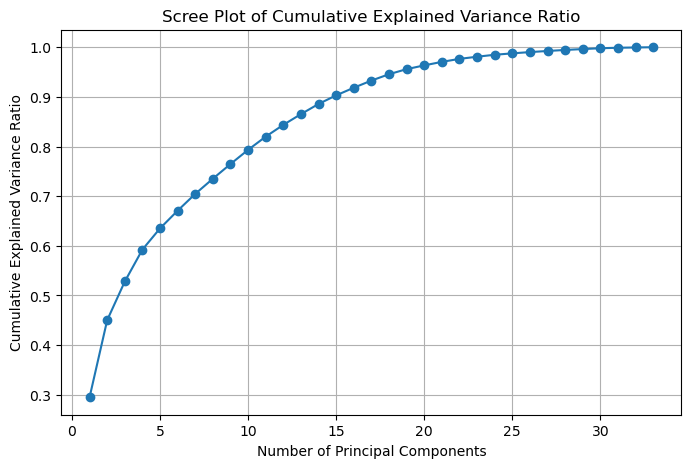

In [106]:
# Set figsize
plt.figure(figsize=(8, 5))

# Visualization of cumulative explained variance ratio
pca = PCA().fit(X_std)
plt.plot(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_.cumsum(), marker='o', linestyle='-')

# Add title and axis label
plt.title('Scree Plot of Cumulative Explained Variance Ratio')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()

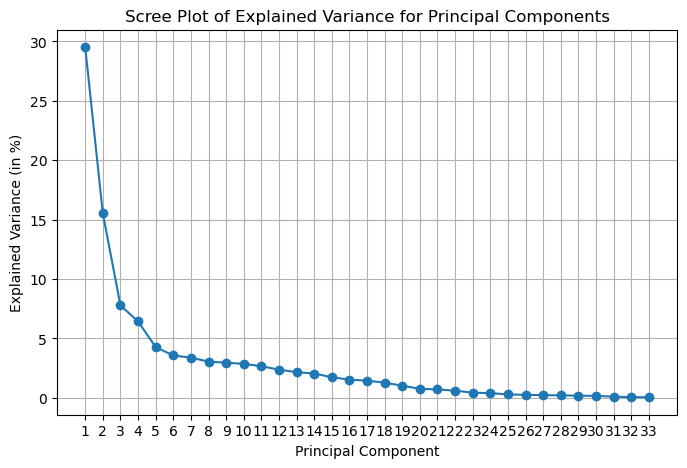

In [107]:
# Get the explained variance ratio for each principal component
explained_variance = pca.explained_variance_ratio_

# Set figsize
plt.figure(figsize=(8, 5))

# Create a scree plot to visualize the explained variance
plt.plot(range(1, len(explained_variance) + 1), # x-axis
         explained_variance*100, # convert explained variance in percentage
         marker='o', # add a marker at each value
        )

# Add title and axis label
plt.title('Scree Plot of Explained Variance for Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance (in %)')

# Add label to x-axis
plt.xticks(range(1, len(explained_variance) + 1))

# Add grid in the background
plt.grid(True)

# Display the chart
plt.show()

In [89]:
# apply PCA with 90% CEV
pca = PCA(0.90)
X_pca = pca.fit_transform(X_std)
X_pca.shape

(3047, 15)

In [90]:
pca.n_components_

15

>Need 15 principal component vectors to retain 90% of the data information

## Model Training

### Reduced-dimensional

In [91]:
# Split the dataset into training and testing sets ( 80% for training, 20% for testing).
from sklearn.model_selection import train_test_split
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca,y, test_size = 0.2,random_state = 101)

In [92]:
y_train_pca = y_train_pca.values.reshape(-1,1)
y_test_pca = y_test_pca.values.reshape(-1,1)
print(f"Training size: \tX_train: {X_train_pca.shape} \ty_train: {y_train_pca.shape}")
print(f"Testing size: \tX_test: {X_test_pca.shape} \ty_test: {y_test_pca.shape}")

Training size: 	X_train: (2437, 15) 	y_train: (2437, 1)
Testing size: 	X_test: (610, 15) 	y_test: (610, 1)


In [93]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
model_pca = regressor.fit(X_train_pca, y_train_pca)

In [94]:
#prediction
y_pred_pca = regressor.predict(X_test_pca)

In [95]:
# Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE) and R-squared.
linear_MAE_pca = metrics.mean_absolute_error(y_test_pca,y_pred_pca)
linear_MSE_pca = metrics.mean_squared_error(y_test_pca,y_pred_pca)
linear_RMSE_pca = np.sqrt(linear_MSE_pca)
linear_R2_pca = r2_score(y_test_pca, y_pred_pca)
pd.DataFrame([linear_MAE_pca,linear_MSE_pca,linear_RMSE_pca,linear_R2_pca],index=['MAE', 'MSE', 'RMSE', 'R^2'], columns=['Metrics'])

,Metrics
MAE,13.612082
MSE,337.566411
RMSE,18.372980
R^2,0.579515


### Non-reduced dimensional 

In [96]:
# Split the dataset into training and testing sets ( 80% for training, 20% for testing).
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std,y, test_size = 0.2,random_state = 101)

In [97]:
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)
print(f"Training size: \tX_train: {X_train.shape} \ty_train: {y_train.shape}")
print(f"Testing size: \tX_test: {X_test.shape} \ty_test: {y_test.shape}")

Training size: 	X_train: (2437, 33) 	y_train: (2437, 1)
Testing size: 	X_test: (610, 33) 	y_test: (610, 1)


In [98]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept = True)
model = regressor.fit(X_train, y_train)

In [99]:
#prediction
y_pred = regressor.predict(X_test)

In [100]:
#Mean Squared Error (MSE), Mean Absolute Error (MAE), Root Mean Squared Error (RMSE) and R-squared.
linear_MAE = metrics.mean_absolute_error(y_test,y_pred)
linear_MSE = metrics.mean_squared_error(y_test,y_pred)
linear_RMSE = np.sqrt(linear_MSE)
linear_R2 = r2_score(y_test, y_pred)
pd.DataFrame([linear_MAE,linear_MSE,linear_RMSE,linear_R2],index=['MAE', 'MSE', 'RMSE', 'R^2'], columns=['Metrics'])

,Metrics
MAE,13.168975
MSE,321.384287
RMSE,17.927194
R^2,0.599672


In [101]:
data = {
    'MAE': [linear_MAE, linear_MAE_pca],
    'MSE': [linear_MSE, linear_MSE_pca],
    'RMSE': [linear_RMSE, linear_RMSE_pca],
    'R^2': [linear_R2, linear_R2_pca]
}
metrics_df = pd.DataFrame(data, index=['Non-PCA', 'PCA'])
# Round to two decimal places
metrics_df = metrics_df.round(3)
metrics_df

,MAE,MSE,RMSE,R^2
Non-PCA,13.169,321.384,17.927,0.60
PCA,13.612,337.566,18.373,0.58


>When reducing data dimensionality using PCA, we see that the performance evaluation indicators of the linear regression model increase slightly compared to when not using PCA. However, the difference is not large between these two cases. Shows that data dimensionality reduction does not greatly affect the explanatory power of the model.

In [102]:
# Tạo DataFrame cho loadings
loadings = pd.DataFrame(pca.components_.T, columns=['PC{}'.format(i) for i in range(1, 16)], index=X.columns)

In [103]:
loadings

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15
avganncount,0.091802,0.255031,0.375365,0.220242,0.139537,0.074925,0.065185,0.080611,-0.098689,-0.086639,0.038545,-0.059949,-0.046910,-0.015296,-0.077773
avgdeathsperyear,0.070519,0.276407,0.377724,0.220252,0.151140,0.104668,0.030160,0.030204,-0.084544,-0.074576,0.010886,-0.078052,-0.079976,-0.040157,-0.071073
incidencerate,0.001502,0.020207,0.112273,-0.286845,0.481194,-0.030461,0.028293,0.038044,0.054403,-0.043808,0.199818,0.265909,0.624394,-0.300023,-0.017561
medincome,0.280752,0.051488,-0.028910,0.061429,-0.004630,-0.112568,-0.226215,0.006057,0.034157,0.177023,0.018042,0.088825,0.057781,-0.113467,0.021424
popest2015,0.074335,0.279997,0.352816,0.247524,0.140278,0.104116,0.028924,0.027272,-0.083815,-0.079470,0.011967,-0.074242,-0.100343,-0.026762,-0.056075
povertypercent,-0.279595,0.134652,-0.042522,-0.069074,-0.021428,0.036373,0.106998,-0.050507,0.000654,-0.086243,-0.031348,-0.004355,-0.074860,-0.022063,0.038891
studypercap,0.030330,0.033029,0.044231,-0.082411,0.057135,0.118670,0.415844,0.367870,0.534595,0.507043,0.230720,-0.203255,-0.111779,0.038036,0.038433
binnedinc,0.284432,0.018150,-0.032851,0.059124,0.043611,-0.083382,-0.155548,0.055093,0.020707,0.122955,0.007969,0.014698,0.094063,-0.053925,-0.099990
medianage,-0.006471,-0.045566,0.072647,-0.011192,-0.040930,-0.042152,-0.410505,0.229747,0.611380,-0.593354,0.146368,-0.092827,-0.075804,0.029941,0.048956
medianagemale,-0.024314,-0.300720,0.365474,-0.000242,-0.170779,-0.017186,-0.180478,0.046245,-0.021542,0.170093,0.033811,0.064229,0.053588,-0.007485,0.008969


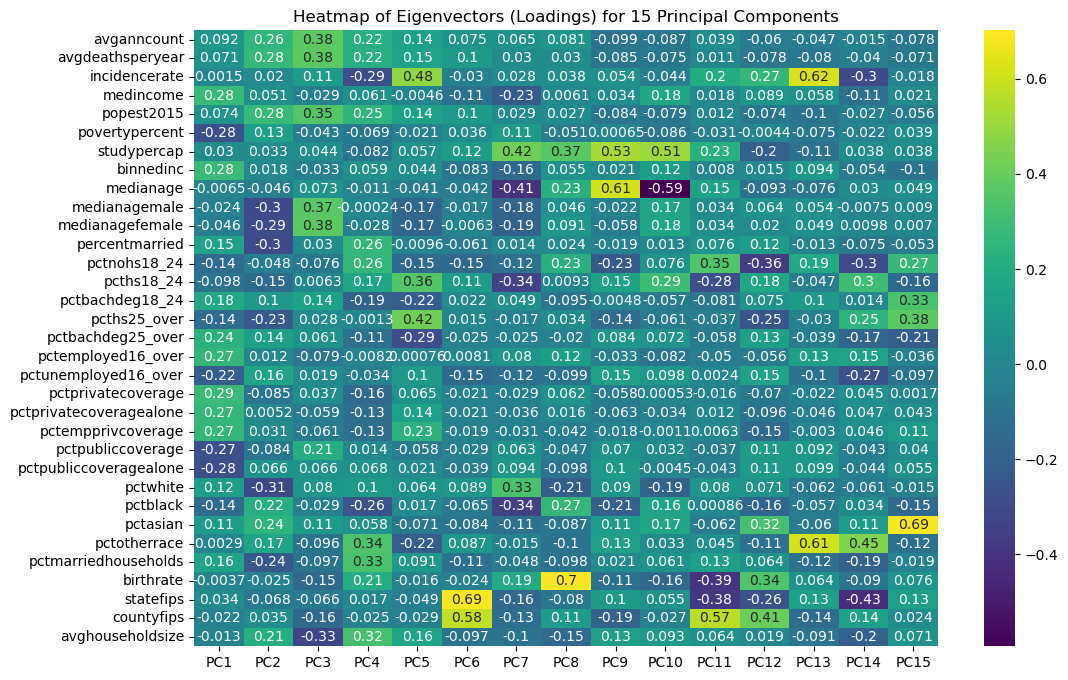

In [104]:
# Loading chart
plt.figure(figsize=(12, 8))
sns.heatmap(loadings, cmap='viridis', annot=True)
plt.title('Heatmap of Eigenvectors (Loadings) for 15 Principal Components')
plt.show()

**Observations from the heatmap:**

**1.Differentiation of Principal Components:**
* PC1 shows strong contributions from features such as avganncount, avgdeathsperyear, and medincome.
* PC2 is strongly influenced by features like povertypercent, percentmarried, and pctprivatecoveragealone.
* PC3 shows significant contributions from features such as percentmarried, birthrate, and pctmarriedhouseholds.


**2.Relationships Among Features:**
* There are sign changes between components, indicating inverse relationships between features. For example, percentmarried contributes positively to PC2 but negatively to PC3.
* A feature like medincome contributes positively to PC1 but has a negative or negligible impact on other principal components.


**3.Diversity of Information:**
* No single feature contributes significantly and uniformly across all principal components, suggesting that each principal component represents different directions in the data and contains independent information.

###  Trade-offs

**Trade-off Between Information and Complexity:**

* When applying PCA, a common trade-off is between reducing the complexity of the data (for example, reducing the number of dimensions) and retaining important information. Reducing dimensions can result in the loss of certain information, but it also helps to eliminate noise and simplifies data computation and visualization.

## Report and Conclusion

### Summary

* Principal Component Analysis (PCA) was utilized to reduce the dimensionality of data from n dimensions down to 15 principal components. Key findings included identifying the contribution level of each original feature to the principal components

### Methodology

**1.EDA**

**2.Data preprocessing steps included:**
* Merging two csv files (by colmuns: geography)
* Scaling numerical features(standardization - Use adjusted variance) 
* Dropping unnecessary columns from the data 
* Handling missing data (fill by median values) 

**3.PCA & Model training:**
* Implement PCA on the preprocessed dataset (suitable number of dimensions: n_component = 15, % of information retained: 90%)
* Models were employed: Linear Regression

### Results

In [105]:
metrics_df

,MAE,MSE,RMSE,R^2
Non-PCA,13.169,321.384,17.927,0.60
PCA,13.612,337.566,18.373,0.58


### Conclusion

* Choosing the number of principal components in PCA is an important step that requires careful consideration. Too few principal components may not retain sufficient necessary information, while too many may not yield benefits in terms of data dimensionality reduction.
* Overall, the data show that data dimensionality reduction using PCA in this case does not provide a significant benefit in terms of prediction performance.


### Importance of PCA

**Data Simplification:**
PCA reduces the complexity of high-dimensional data by synthesizing it into fewer dimensions while trying to retain as much information as possible. This simplification is crucial to make the data more manageable and understandable.

**Noise Reduction:**
By focusing on the principal components with the highest variance, PCA can effectively filter out noise and less informative variables, resulting in more stable and robust data models.

**Computational Efficiency:**
Algorithms often run faster with lower-dimensional data. PCA can significantly reduce the size, thereby decreasing the computational costs of data processing and model training without sacrificing much accuracy.

**Preventing Overfitting:**
In machine learning, models trained on high-dimensional data may suffer from overfitting, meaning they may not perform well on unseen data. PCA can mitigate this by reducing the number of input features, reducing the complexity of the model.